In [1]:
%matplotlib inline
from config_calc import *
import pandas as pd

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

import colorbrewer

import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt

In [2]:
df_chc2mcm = pd.read_csv('scargo_data/SCARGO_MCM_North.out',delimiter=' ')
df_mcm2spo = pd.read_csv('scargo_data/SCARGO_MCMtoSPO.out',delimiter=' ')
df_ch2mm = pd.read_csv('scargo_data/SCARGO_CHtoMM.out',delimiter=' ')
df_chc2mcm

,alt2,min,phase,gs,dist,fb,fuel,lat,lon,hdg
0,1.0000,0.000000,1,0.0000,0.000000,0.000,0.00000,-77.85390,166.4686,6
1,101.0000,0.166667,1,192.7430,0.534976,6025.140,16.74492,-77.84503,166.4730,6
2,201.0000,0.166667,1,193.0567,0.535848,6018.865,16.72749,-77.83615,166.4775,6
3,301.0000,0.166667,1,193.3705,0.536719,6012.591,16.71007,-77.82725,166.4819,6
4,401.0000,0.166667,1,193.6842,0.537590,6006.316,16.69264,-77.81834,166.4863,6
5,501.0000,0.166667,1,193.9979,0.538462,6000.042,16.67521,-77.80942,166.4908,6
6,601.0000,0.166667,1,194.3116,0.539333,5993.767,16.65778,-77.80048,166.4952,6
7,701.0000,0.166667,1,194.6254,0.540205,5987.493,16.64035,-77.79152,166.4997,6
8,801.0000,0.166667,1,194.9391,0.541076,5981.218,16.62292,-77.78256,166.5041,6
9,901.0000,0.166667,1,195.2528,0.541948,5974.944,16.60549,-77.77357,166.5086,6


In [3]:
%%time
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['CO2','CO2_OCN','Z3','Pm','Pi','TMCO2_OCN','theta']

ds = cesm.open_casedata(case,'atm','cam.h0',varlist)

ds = ds.sel(time=slice('2016-01-15','2016-02-29'))

ds = cesm.convert_dataset(ds,case)

print('ds size {:0.2f}GB\n'.format(ds.nbytes / 1e9))
ds.info()

ds size 4.60GB

xarray.Dataset {
dimensions:
	ilev = 57 ;
	lat = 192 ;
	lev = 56 ;
	lon = 288 ;
	nbnd = 2 ;
	slat = 191 ;
	slon = 288 ;
	time = 46 ;

variables:
	float32 CO2(time, lev, lat, lon) ;
		CO2:mdims = 1 ;
		CO2:units = ppmv ;
		CO2:long_name = CO2 ;
		CO2:cell_methods = time: mean ;
	float64 P0() ;
		P0:long_name = reference pressure ;
		P0:units = Pa ;
	float64 ch4vmr(time) ;
		ch4vmr:long_name = ch4 volume mixing ratio ;
	float64 co2vmr(time) ;
		co2vmr:long_name = co2 volume mixing ratio ;
	float64 f11vmr(time) ;
		f11vmr:long_name = f11 volume mixing ratio ;
	float64 f12vmr(time) ;
		f12vmr:long_name = f12 volume mixing ratio ;
	float64 gw(lat) ;
		gw:long_name = gauss weights ;
	float64 hyai(ilev) ;
		hyai:long_name = hybrid A coefficient at layer interfaces ;
	float64 hyam(lev) ;
		hyam:long_name = hybrid A coefficient at layer midpoints ;
	float64 hybi(ilev) ;
		hybi:long_name = hybrid B coefficient at layer interfaces ;
	float64 hybm(lev) ;
		hybm:long_name = hybrid B

In [4]:
P500mb = xr.DataArray(
            np.array([500.,700.]),
        dims=('plev'),
        attrs={'long_name':'500mb',
               'units':'Pa'})
dsh = cam.remap_vertical_coord(ds.Pm,*[ds[v] for v in ['Z3']],new_levels=P500mb)
dsh
                            

interpolating Z3


/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, plev: 2, time: 46)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
  * time     (time) datetime64[ns] 2016-01-15 2016-01-16 2016-01-17 ...
  * plev     (plev) float64 500.0 700.0
Data variables:
    Z3       (time, plev, lat, lon) float64 5.16e+03 5.16e+03 5.16e+03 ...

In [5]:
waypoints = {'Christchurch\n(CHC)':[172.+32./60.,-43+29./60.,],
             'Profile (60S)':[170.,-60.],
             'Profile (65S)':[170.,-65.],             
             'Profile (70S)':[170.,-70.],                          
             'McMurdo (MCM)' : [166+28./60.,-77+51/60.],
             'Beardmore' : [164+23./60.,-84.],
             'South Pole (SPO)': [139+16/60.,-90.]}

cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


2016-02-20T00:00:00.000000000
<xarray.DataArray 'CO2_OCN' (lat: 192, lon: 288)>
array([[-9.233346, -9.233346, -9.233346, ..., -9.233346, -9.233346, -9.233346],
       [-9.230742, -9.229707, -9.228596, ..., -9.233346, -9.232542, -9.231699],
       [-9.237792, -9.237562, -9.237217, ..., -9.237983, -9.237983, -9.237945],
       ...,
       [-9.440691, -9.442186, -9.443145, ..., -9.433832, -9.436477, -9.438699],
       [-9.279214, -9.279329, -9.279367, ..., -9.278449, -9.278793, -9.279023],
       [-9.220165, -9.220165, -9.220165, ..., -9.220165, -9.220165, -9.220165]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
    lev      float64 992.5
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
    time     datetime64[ns] 2016-02-20
Attributes:
    mdims:         1
    units:         ppmv
    long_name:     CO2_OCN
    cell_methods:  time: mean
[-11.  -10.8 -10.6 -10.4 -10.2 -10.   -9.8  -9.6  -9.4  

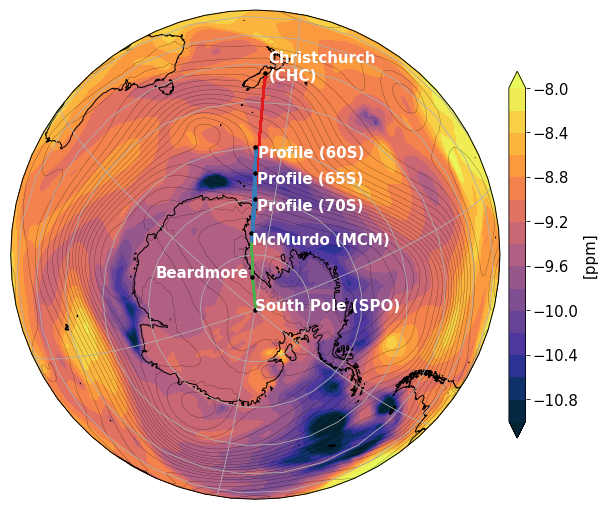

In [6]:
import cartopy.util as cutil 
import plot_tools
import cmocean
import matplotlib.patheffects as path_effects

lon = np.concatenate((df_ch2mm.lon.values,df_chc2mcm.lon.values,df_mcm2spo.lon.values))
lat = np.concatenate((df_ch2mm.lat.values,df_chc2mcm.lat.values,df_mcm2spo.lat.values))
alt = np.concatenate((df_ch2mm.alt2.values,df_chc2mcm.alt2.values,df_mcm2spo.alt2.values))

fig = plt.figure(figsize=(16,9))

prj = ccrs.NearsidePerspective(central_latitude=-80,
                               central_longitude=170,
                               satellite_height=10000000.0*2)

#prj = ccrs.SouthPolarStereo()#central_longitude=180)
#prj = ccrs.Orthographic(210, -45)
crs_latlon = ccrs.PlateCarree()
ax = plt.axes(projection=prj)

#ax.set_extent([180,-180,-90,-35],crs=crs_latlon)
ax.set_global()


#--- plot co2
l = -10
print(ds.time.values[l])
mlon = ds.lon
mlat = ds.lat
mfield = ds.CO2_OCN.isel(lev=-1,time=l)
print mfield
mfield, mlon = cutil.add_cyclic_point(mfield.values, coord=mlon.values)
levels = plot_tools.nice_levels(-11.,-8.,30,outside=False)
print levels
cf = ax.contourf(mlon,mlat,mfield,
                 cmap = cmocean.cm.thermal,
                 extend='both',
                 levels=levels,
                 transform=crs_latlon)


mlon = dsh.lon
mlat = dsh.lat
mfield = dsh.Z3.isel(plev=0,time=l) #ds.CO2.isel(lev=-1,time=-1) - ds.CO2.isel(lev=-10,time=-1)
print mfield
mfield, mlon = cutil.add_cyclic_point(mfield.values, coord=mlon.values)
levels = plot_tools.nice_levels(np.min(mfield),np.max(mfield),30,outside=False)
print levels
ax.contour(mlon,mlat,mfield,
            levels=levels,
            colors='k',
            linewidths=0.2,
            transform=crs_latlon)

ax.coastlines('50m')
ax.gridlines()

#--plot flights
#color = colorbrewer.qualitative8y()
#ax.plot(lon,lat,'.',
#        transform=ccrs.PlateCarree(),
#        color=color[0],
#        markersize=4,
#        linewidth=0.5)

color = colorbrewer.qualitative8y()
pl = plt.plot(df_ch2mm.lon,df_ch2mm.lat,'.',markersize=2,color=color[0],transform=ccrs.PlateCarree())
pl = plt.plot(df_chc2mcm.lon,df_chc2mcm.lat,'.',markersize=2,color=color[1],transform=ccrs.PlateCarree())
pl = plt.plot(df_mcm2spo.lon,df_mcm2spo.lat,'.',markersize=2,color=color[2],transform=ccrs.PlateCarree())


for name,lonlat in waypoints.items():    
    ax.plot(lonlat[0],lonlat[1],'.',markersize=7,transform=ccrs.PlateCarree(),color='k')
    if 'Christchurch' in name:
        t = ax.text(lonlat[0]+1,lonlat[1]-2,name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')
    elif 'Profile' in name:
        t = ax.text(lonlat[0]+1,lonlat[1]-2,name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')        
    elif 'McMurdo' in name:
        t = ax.text(lonlat[0]+1,lonlat[1]-2,name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')
    elif name == 'Beardmore':
        t = ax.text(lonlat[0]-5,lonlat[1],name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),horizontalalignment='right',color='w')
    elif 'South Pole' in name:
        t = ax.text(lonlat[0]+2,lonlat[1],name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')
    else:
        continue

#cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,shrink=0.75,pad=0.01)#,cax=cbax)
cb.set_label('[ppm]',fontsize=15)
cb.ax.tick_params(labelsize=15) 
plt.savefig(os.path.join(diro['fig'],'scargo-flight-map-co2-Z3_500mb.pdf'),dpi=300,bbox_inches='tight',
           transparent=True)

2016-02-20T00:00:00.000000000
<xarray.DataArray 'CO2_OCN' (lat: 192, lon: 288)>
array([[-8.861192, -8.861192, -8.861192, ..., -8.861192, -8.861192, -8.861192],
       [-8.833409, -8.83249 , -8.831609, ..., -8.836666, -8.835517, -8.834406],
       [-8.826015, -8.826589, -8.827126, ..., -8.824443, -8.824903, -8.825439],
       ...,
       [-9.232427, -9.229783, -9.226909, ..., -9.238788, -9.23691 , -9.234765],
       [-9.231124, -9.230358, -9.229707, ..., -9.233577, -9.232848, -9.232082],
       [-9.240973, -9.240973, -9.240973, ..., -9.240973, -9.240973, -9.240973]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
    lev      float64 618.8
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
    time     datetime64[ns] 2016-02-20
Attributes:
    mdims:         1
    units:         ppmv
    long_name:     CO2_OCN
    cell_methods:  time: mean
[-11.  -10.8 -10.6 -10.4 -10.2 -10.   -9.8  -9.6  -9.4  

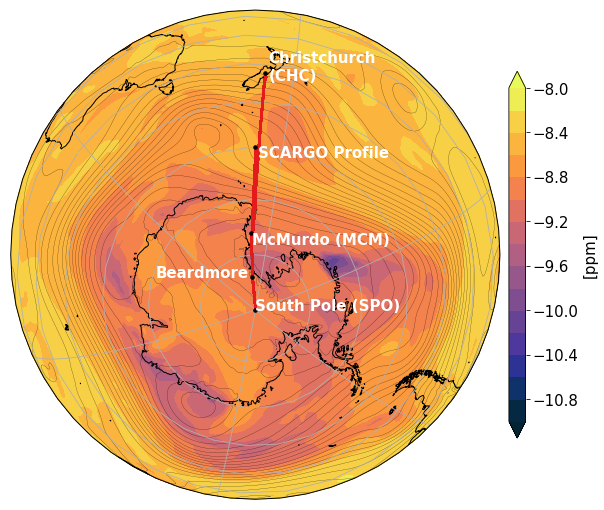

In [7]:
import cartopy.util as cutil 
import plot_tools
import cmocean
import matplotlib.patheffects as path_effects

lon = np.concatenate((df_ch2mm.lon.values,df_chc2mcm.lon.values,df_mcm2spo.lon.values))
lat = np.concatenate((df_ch2mm.lat.values,df_chc2mcm.lat.values,df_mcm2spo.lat.values))
alt = np.concatenate((df_ch2mm.alt2.values,df_chc2mcm.alt2.values,df_mcm2spo.alt2.values))

fig = plt.figure(figsize=(16,9))

prj = ccrs.NearsidePerspective(central_latitude=-80,
                               central_longitude=170,
                               satellite_height=10000000.0*2)

#prj = ccrs.SouthPolarStereo()#central_longitude=180)
#prj = ccrs.Orthographic(210, -45)
crs_latlon = ccrs.PlateCarree()
ax = plt.axes(projection=prj)

#ax.set_extent([180,-180,-90,-35],crs=crs_latlon)
ax.set_global()


#--- plot co2
l = -10
print(ds.time.values[l])
mlon = ds.lon
mlat = ds.lat
mfield = ds.CO2_OCN.isel(lev=-20,time=l)
print mfield
mfield, mlon = cutil.add_cyclic_point(mfield.values, coord=mlon.values)
levels = plot_tools.nice_levels(-11.,-8.,30,outside=False)
print levels
cf = ax.contourf(mlon,mlat,mfield,
                 cmap = cmocean.cm.thermal,
                 extend='both',
                 levels=levels,
                 transform=crs_latlon)


mlon = dsh.lon
mlat = dsh.lat
mfield = dsh.Z3.isel(plev=0,time=l) #ds.CO2.isel(lev=-1,time=-1) - ds.CO2.isel(lev=-10,time=-1)
print mfield
mfield, mlon = cutil.add_cyclic_point(mfield.values, coord=mlon.values)
levels = plot_tools.nice_levels(np.min(mfield),np.max(mfield),30,outside=False)
print levels
ax.contour(mlon,mlat,mfield,
            levels=levels,
            colors='k',
            linewidths=0.2,
            transform=crs_latlon)

ax.coastlines('50m')
ax.gridlines()

#--plot flights
color = colorbrewer.qualitative8y()
ax.plot(lon,lat,'.',
        transform=ccrs.PlateCarree(),
        color=color[0],
        markersize=4,
        linewidth=0.5)

for name,lonlat in waypoints.items():    
    ax.plot(lonlat[0],lonlat[1],'.',markersize=7,transform=ccrs.PlateCarree(),color='k')
    if 'Christchurch' in name:
        t = ax.text(lonlat[0]+1,lonlat[1]-2,name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')
    elif name == 'SCARGO Profile':
        t = ax.text(lonlat[0]+1,lonlat[1]-2,name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')        
    elif 'McMurdo' in name:
        t = ax.text(lonlat[0]+1,lonlat[1]-2,name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')
    elif name == 'Beardmore':
        t = ax.text(lonlat[0]-5,lonlat[1],name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),horizontalalignment='right',color='w')
    elif 'South Pole' in name:
        t = ax.text(lonlat[0]+2,lonlat[1],name,fontweight='bold',fontsize=15,transform=ccrs.PlateCarree(),color='w')
    else:
        continue

#cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,shrink=0.75,pad=0.01)#,cax=cbax)
cb.set_label('[ppm]',fontsize=15)
cb.ax.tick_params(labelsize=15) 
#plt.savefig(os.path.join(diro['fig'],'scargo-flight-map-co2-aloft-Z3_500mb.pdf'),dpi=300,bbox_inches='tight',
#           transparent=True)

### compute pressure weighted column mean
compute pressure weights as dP/dlev 

In [38]:
wp = ds.Pi.diff(dim='ilev').mean('time').rename({'ilev':'lev'})
wp['lev'] = ds.lev
wp = wp.where((400. <= ds.Pm)).fillna(0.)
wp = wp / wp.sum('lev')
wp

<xarray.DataArray (lev: 56, lat: 192, lon: 288, time: 46)>
array([[[[0.      , ..., 0.      ],
         ...,
         [0.      , ..., 0.      ]],

        ...,

        [[0.      , ..., 0.      ],
         ...,
         [0.      , ..., 0.      ]]],


       ...,


       [[[0.035342, ..., 0.035342],
         ...,
         [0.035342, ..., 0.035342]],

        ...,

        [[0.025373, ..., 0.025373],
         ...,
         [0.025373, ..., 0.025373]]]])
Coordinates:
  * lev      (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 8.456 ...
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
  * time     (time) datetime64[ns] 2016-01-15 2016-01-16 2016-01-17 ...

In [42]:
ds['CO2_OCN_ZAVG'] = (ds.CO2_OCN * wp).sum('lev')
ds.CO2_OCN_ZAVG

<xarray.DataArray 'CO2_OCN_ZAVG' (time: 46, lat: 192, lon: 288)>
array([[[-9.080738, -9.080738, ..., -9.080738, -9.080738],
        [-9.103095, -9.10325 , ..., -9.101569, -9.102397],
        ...,
        [-8.716006, -8.715895, ..., -8.716207, -8.716106],
        [-8.708632, -8.708632, ..., -8.708632, -8.708632]],

       [[-9.212069, -9.212069, ..., -9.212069, -9.212069],
        [-9.162724, -9.161451, ..., -9.165217, -9.164047],
        ...,
        [-8.718824, -8.718826, ..., -8.718836, -8.718823],
        [-8.71529 , -8.71529 , ..., -8.71529 , -8.71529 ]],

       ...,

       [[-8.818835, -8.818835, ..., -8.818835, -8.818835],
        [-8.872561, -8.872366, ..., -8.872966, -8.872764],
        ...,
        [-9.273785, -9.273239, ..., -9.275009, -9.274376],
        [-9.278203, -9.278203, ..., -9.278203, -9.278203]],

       [[-8.8026  , -8.8026  , ..., -8.8026  , -8.8026  ],
        [-8.800574, -8.800363, ..., -8.800886, -8.800751],
        ...,
        [-9.247372, -9.246911, ..., -9

plot column mean

['2016-01-31T00:00:00.000000000' '2016-02-01T00:00:00.000000000'
 '2016-02-02T00:00:00.000000000' '2016-02-03T00:00:00.000000000'
 '2016-02-04T00:00:00.000000000' '2016-02-05T00:00:00.000000000'
 '2016-02-06T00:00:00.000000000' '2016-02-07T00:00:00.000000000'
 '2016-02-08T00:00:00.000000000' '2016-02-09T00:00:00.000000000'
 '2016-02-10T00:00:00.000000000' '2016-02-11T00:00:00.000000000'
 '2016-02-12T00:00:00.000000000' '2016-02-13T00:00:00.000000000'
 '2016-02-14T00:00:00.000000000' '2016-02-15T00:00:00.000000000'
 '2016-02-16T00:00:00.000000000' '2016-02-17T00:00:00.000000000'
 '2016-02-18T00:00:00.000000000' '2016-02-19T00:00:00.000000000']
<xarray.DataArray 'CO2_OCN_ZAVG' (lat: 192, lon: 288)>
array([[-9.141221, -9.141221, -9.141221, ..., -9.141221, -9.141221, -9.141221],
       [-9.144983, -9.144075, -9.143145, ..., -9.147524, -9.146705, -9.145862],
       [-9.155099, -9.153545, -9.152022, ..., -9.159914, -9.158282, -9.156677],
       ...,
       [-9.08754 , -9.087801, -9.088048, .

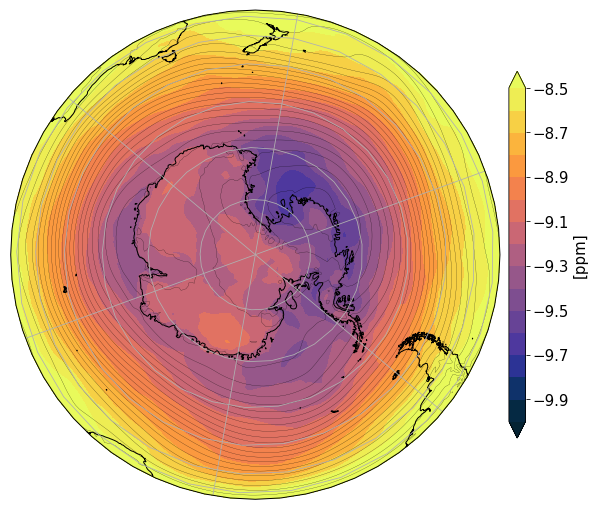

In [94]:
import cartopy.util as cutil 
import plot_tools
import cmocean
import matplotlib.patheffects as path_effects

lon = np.concatenate((df_ch2mm.lon.values,df_chc2mcm.lon.values,df_mcm2spo.lon.values))
lat = np.concatenate((df_ch2mm.lat.values,df_chc2mcm.lat.values,df_mcm2spo.lat.values))
alt = np.concatenate((df_ch2mm.alt2.values,df_chc2mcm.alt2.values,df_mcm2spo.alt2.values))

fig = plt.figure(figsize=(16,9))

prj = ccrs.NearsidePerspective(central_latitude=-90,
                               central_longitude=170,
                               satellite_height=10000000.0*2)

#prj = ccrs.SouthPolarStereo()#central_longitude=180)
#prj = ccrs.Orthographic(210, -45)
crs_latlon = ccrs.PlateCarree()
ax = plt.axes(projection=prj)

#ax.set_extent([180,-180,-90,-35],crs=crs_latlon)
ax.set_global()


#--- plot co2
l = slice(-30,-10)
print(ds.time.values[l])
mlon = ds.lon
mlat = ds.lat
mfield = ds.CO2_OCN_ZAVG.isel(time=l).mean('time')
print mfield
mfield, mlon = cutil.add_cyclic_point(mfield.values, coord=mlon.values)
levels = plot_tools.nice_levels(-10.,-8.5,30,outside=False)
print levels
cf = ax.contourf(mlon,mlat,mfield,
                 cmap = cmocean.cm.thermal,
                 extend='both',
                 levels=levels,
                 transform=crs_latlon)


mlon = dsh.lon
mlat = dsh.lat
mfield = dsh.Z3.isel(plev=0,time=l).mean('time') #ds.CO2.isel(lev=-1,time=-1) - ds.CO2.isel(lev=-10,time=-1)
print mfield
mfield, mlon = cutil.add_cyclic_point(mfield.values, coord=mlon.values)
levels = plot_tools.nice_levels(np.min(mfield),np.max(mfield),30,outside=False)
print levels
ax.contour(mlon,mlat,mfield,
            levels=levels,
            colors='k',
            linewidths=0.2,
            transform=crs_latlon)

ax.coastlines('50m')
ax.gridlines()

#cbax = fig.add_axes([0.87,0.1,0.03,0.75])
cb = plt.colorbar(cf,shrink=0.75,pad=0.01)#,cax=cbax)
cb.set_label('[ppm]',fontsize=15)
cb.ax.tick_params(labelsize=15) 
#plt.savefig(os.path.join(diro['fig'],'scargo-flight-map-co2-zavg-Z3_500mb.pdf'),dpi=300,bbox_inches='tight',
#           transparent=True)

### look at zonal variability
compute zonal mean in region

In [85]:
dsza = ds.sel(lat=slice(-70,-50)).mean('lat')
dsza

<xarray.Dataset>
Dimensions:       (ilev: 57, lev: 56, lon: 288, nbnd: 2, slat: 191, slon: 288, time: 46)
Coordinates:
  * ilev          (ilev) float64 1.651 2.085 2.62 3.276 4.077 5.047 6.217 ...
  * lev           (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 ...
  * lon           (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 ...
  * slat          (slat) float64 -89.53 -88.59 -87.64 -86.7 -85.76 -84.82 ...
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 4.375 5.625 6.875 ...
  * time          (time) datetime64[ns] 2016-01-15 2016-01-16 2016-01-17 ...
Dimensions without coordinates: nbnd
Data variables:
    CO2           (time, lev, lon) float32 381.35144 381.35327 381.355 ...
    P0            float64 1e+05
    ch4vmr        (time) float64 1.846e-06 1.846e-06 1.846e-06 1.846e-06 ...
    co2vmr        (time) float64 0.0004031 0.0004031 0.0004031 0.0004031 ...
    f11vmr        (time) float64 8.077e-10 8.077e-10 8.077e-10 8.077e-10 ...
    f12vmr        (tim

take moving average and plot hovmöller

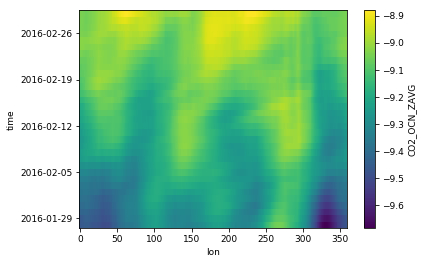

In [93]:
dsza_mavg = dsza.rolling(time=14).mean().dropna('time')
dsza_mavg.CO2_OCN_ZAVG.plot()

unfiltered hovmöller

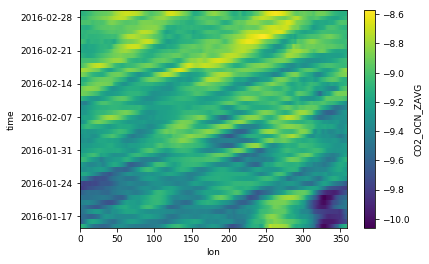

In [92]:
dsza.CO2_OCN_ZAVG.plot()

### look at variability in Alt-Lat plane

remap to to height coordinate

In [8]:
geopotential_height_levels = xr.DataArray(
        np.array([ 42482.4296875,40789.765625,39157.46875,
                   37586.35546875,36074.7578125,34620.71875,
                   33221.05078125,31872.421875,30571.47265625,
                   29308.29492188,28075.45507812,26870.96875,
                   25694.5390625,24545.7109375,23423.09570312,
                   22326.65625,21252.5234375,20197.5078125,
                   19162.2578125,18146.8984375,17149.96484375,
                   16160.68554688,15167.20898438,14164.18066406,
                   13147.97851562,12116.08984375,11066.44824219,
                   9995.7109375,8912.61816406,8007.54882812,
                   7296.19238281,6637.14892578,6022.51513672,
                   5446.35351562,4903.87304688,4391.23974609,
                   3905.2668457,3443.27319336,3074.66967773,
                   2790.08691406,2513.83837891,2245.44848633,
                   1984.4967041,1755.61950684,1581.37988281,
                   1434.59033203,1290.03381348,1147.62548828,
                   1007.2913208,868.96289062,732.5602417,
                   598.00524902,465.22851562,334.16360474,
                   204.7640686,77.2164535]),
        dims=('zlev'),
        attrs={'long_name':'Geopotential height (above sea level)',
               'units':'m'})

dsh2 = cam.remap_vertical_coord(ds.Z3,*[ds.CO2_OCN],new_levels=geopotential_height_levels)
dsh2.zlev.values = dsh2.zlev.values * 1e-3
dsh2

interpolating CO2_OCN


/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/metpy/calc/tools.py:702: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 46, zlev: 56)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
  * time     (time) datetime64[ns] 2016-01-15 2016-01-16 2016-01-17 ...
  * zlev     (zlev) float64 42.48 40.79 39.16 37.59 36.07 34.62 33.22 31.87 ...
Data variables:
    CO2_OCN  (time, zlev, lat, lon) float64 -2.343 -2.343 -2.343 -2.343 ...

plot standard deviation wrt to lon

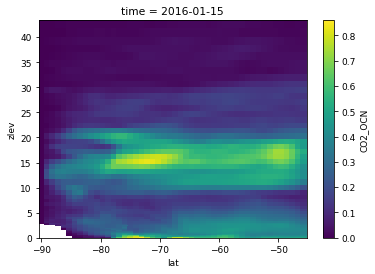

In [9]:
dsh2.CO2_OCN.sel(lat=slice(-90,-45)).std('lon').isel(time=0).plot()

### find good range for theta

In [123]:
ds_theta = cesm.open_casedata(case,'atm','cam.h0',['theta'])

(array([3.125000e+03, 1.116130e+05, 6.939060e+05, 2.553617e+06,
        5.230879e+06, 7.363127e+06, 4.269784e+06, 2.231709e+06,
        1.289335e+06, 9.930500e+04]),
 array([225.32183749, 239.18220284, 253.0425682 , 266.90293356,
        280.76329891, 294.62366427, 308.48402962, 322.34439498,
        336.20476034, 350.06512569, 363.92549105]),
 <a list of 10 Patch objects>)

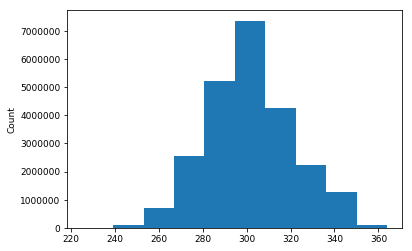

In [124]:
ds_theta.theta.isel(lat=slice(-90,-30)).where(ds.Pm>=200.).plot()

<xarray.DataArray 'theta' (lev: 56)>
array([1531.550536, 1415.645921, 1306.790381, 1206.624807, 1117.051229,
       1035.80575 ,  964.354643,  899.446766,  842.563603,  790.087503,
        742.155736,  698.633782,  657.115678,  619.541533,  584.633965,
        551.775882,  521.502247,  492.485518,  464.882247,  439.140474,
        416.632964,  398.323999,  383.354663,  371.004341,  360.124687,
        349.715697,  340.539713,  333.807792,  329.040097,  325.753885,
        323.091031,  320.685996,  318.297044,  315.96812 ,  313.698656,
        311.395547,  309.226394,  307.047251,  305.337911,  304.039502,
        302.755956,  301.480772,  300.212722,  299.099592,  298.259504,
        297.552238,  296.875607,  296.234227,  295.599966,  295.00089 ,
        294.454377,  293.977393,  293.570532,  293.211846,  292.851014,
        292.362317])
Coordinates:
  * lev      (lev) float64 1.868 2.353 2.948 3.677 4.562 5.632 6.918 8.456 ...


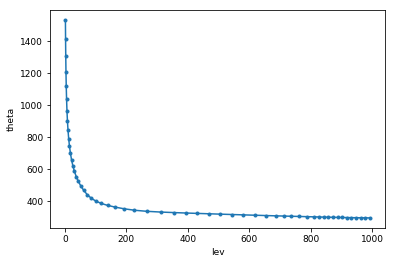

In [128]:
theta_mean = ds_theta.theta.isel(lat=slice(-90,-30)).mean(dim=['time','lon','lat'])
theta_mean.plot(marker='.')
print(theta_mean)

<xarray.DataArray 'theta' (lev: 55)>
array([-115.904615, -108.85554 , -100.165574,  -89.573578,  -81.245478,
        -71.451107,  -64.907878,  -56.883163,  -52.4761  ,  -47.931767,
        -43.521954,  -41.518104,  -37.574145,  -34.907568,  -32.858083,
        -30.273635,  -29.01673 ,  -27.60327 ,  -25.741773,  -22.50751 ,
        -18.308965,  -14.969336,  -12.350322,  -10.879654,  -10.40899 ,
         -9.175984,   -6.731922,   -4.767694,   -3.286212,   -2.662855,
         -2.405034,   -2.388952,   -2.328924,   -2.269464,   -2.303109,
         -2.169153,   -2.179143,   -1.70934 ,   -1.298409,   -1.283546,
         -1.275183,   -1.26805 ,   -1.113131,   -0.840087,   -0.707266,
         -0.676631,   -0.641379,   -0.634261,   -0.599077,   -0.546512,
         -0.476984,   -0.406861,   -0.358686,   -0.360831,   -0.488698])
Coordinates:
  * lev      (lev) float64 2.353 2.948 3.677 4.562 5.632 6.918 8.456 10.28 ...


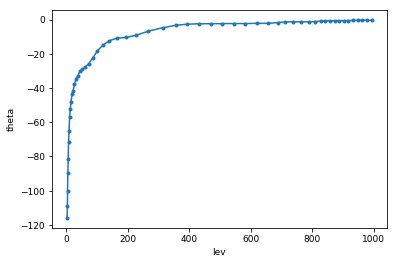

In [129]:
theta_mean.diff('lev').plot(marker='.')
print(theta_mean.diff('lev'))

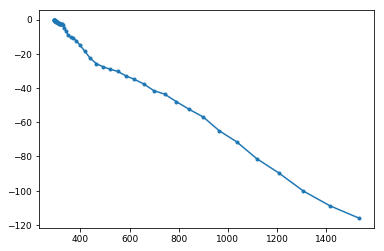

In [130]:
plt.plot(theta_mean[:-1],theta_mean.diff('lev'),marker='.')

(56,)
[1500.  750.  450.  400.  375.  370.  365.  360.  355.  350.  345.  340.
  335.  330.  328.  326.  324.  322.  320.  318.  316.  314.  312.  310.
  308.  306.  304.  302.  300.  299.  298.  297.  296.  295.  294.  293.
  292.  291.  290.  289.  288.  287.  286.  285.  284.  283.  282.  281.
  280.  279.  278.  277.  276.  275.  274.  273.]


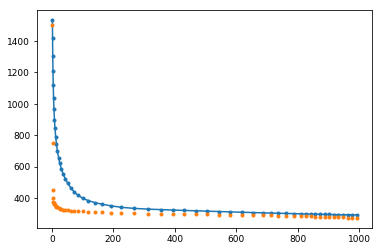

In [166]:
dt = 2.5
theta = np.array([1500.,750.,450.,425.,400.,  
                  380.,370.,360.,350.,340.,330.,
                  325.,320.,318.,316.,314.,312.,310.,308.,306.,304.,302.,
                  300.,299.,298.,297.,296.,295.,294.,293.,292.,291.,290.,
                  289.5,289,287.5,287.,286.5,286.,
                  285.5,285.,284.5,284.,283.5,283.,282.5,282.,281.5,
                  281.,280.5,280.,279.5,279.,278.5,278.,277.5,
                  277.,276.5,276.,275.5,
                 ])

theta = np.concatenate((np.array([1500.,750.,450.,400.]),
                       np.arange(375.,330.,-5.),
                       np.arange(330.,300.,-2.),                        
                       np.arange(300.,272.,-1),                   
                       ))
print(theta.shape)
print(theta)
plt.plot(theta_mean.lev,theta_mean,'.-')
plt.plot(theta_mean.lev,theta,'.')


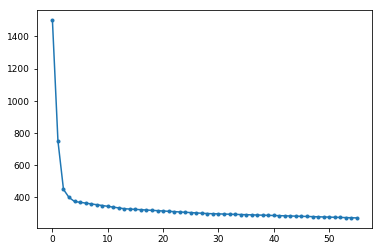

In [168]:
plt.plot(theta,'.-')
